In [1]:
# all the imports used throughout the notebook:
import json
import pandas as pd
import numpy as np
import wrangle
import acquire
import model
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, prep_string_data#, split_data
import scipy as sp
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
eval_df, train, validate, test = model.run_modeling()

The df has 1889857 rows and 12 columns.
train shape is (56000, 13)
validate shape is (24000, 13)
test shape is (20000, 13)
Basic Splits Created
TF_IDF Splits Created
Count Vectorizer Splits Created
Logistic Regression Beginning
LR done
Decision Tree beginning
DT done
Random Forest beginning
RF done


In [3]:
eval_df

,Model_Type,Train_Accuracy,Validate_Accuracy,Accuracy_Difference,Beats_Baseline_By
0,baseline_pred,0.624643,0.624625,0.000018,-0.000018
0,Log_Reg_Just_Features,0.677214,0.672958,0.004256,0.048315
0,Log_Reg_Just_TFIDF,0.819464,0.769250,0.050214,0.144607
0,Log_Reg_TFIDF_Plus_Features,0.765839,0.757000,0.008839,0.132357
0,Log_Reg_CV,0.856339,0.752708,0.103631,0.128065
0,Log_Reg_CV_Plus_Features,0.770946,0.762500,0.008446,0.137857
0,Decision_Tree_Just_Features,0.726946,0.722125,0.004821,0.097482
0,DecisionTree_Just_TFIDF,0.691304,0.689250,0.002054,0.064607
0,Decision_Tree_TFIDF_PlusFeatures,0.737714,0.734083,0.003631,0.109440
0,DecisionTree_Just_Countvectorizer,0.696054,0.693708,0.002345,0.069065


## REDEFINE BASELINE IN .PY

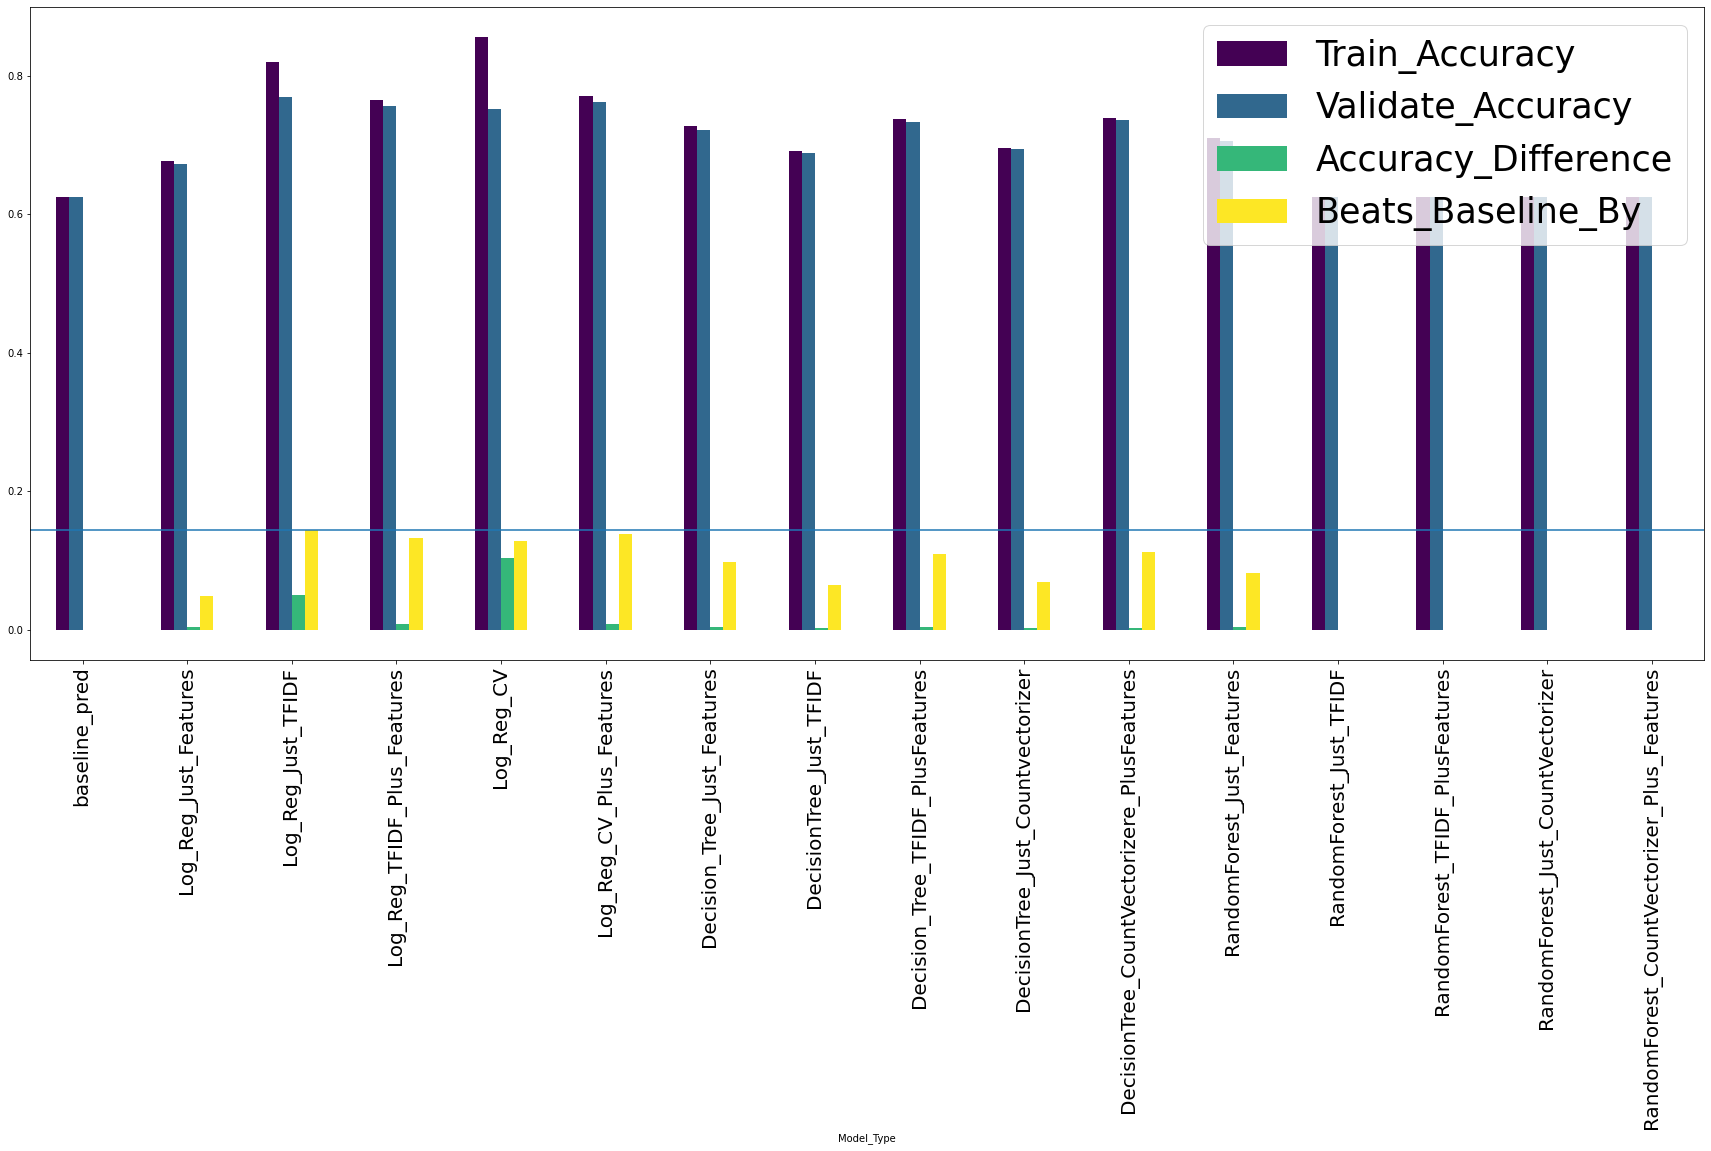

In [43]:
from matplotlib import cm
# define columns of eval df for use plotting below
columns = ['Train_Accuracy', 'Validate_Accuracy','Accuracy_Difference', 'Beats_Baseline_By']
cmap = cm.get_cmap('viridis')
# plot all the results, grouped by model
eval_df.plot(x='Model_Type', y=columns, kind="bar", figsize=(30,12),cmap=cmap)

plt.legend(prop={'size': 35}, loc='upper right')#(loc=(1.01,1.2), bbox_to_anchor=(.5, 0., .5, .5))
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)

# add h line for highest gross performing model
plt.axhline(y=eval_df.Beats_Baseline_By.max())
plt.xticks(rotation=90, fontsize=20);

## The best model in our opionion is the Logistic Regression on Count Vectorizer plus additional Features

## Running this model on TEST

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [6]:
print('Train Accuracy, Countvectorizer_PlusFeatures: {:.2%}'.format(accuracy_score(train.actual, train.predicted_X_cv_plus_features)))
print('---')
# print('Confusion Matrix')
# print(pd.crosstab(train.predicted, train.actual))
# print('---')
print('Validate Accuracy, Countvectorizer_PlusFeatures: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_X_cv_plus_features)))
print('---')

print('Test Accuracy, Countvectorizer_PlusFeatures: {:.2%}'.format(accuracy_score(test.actual, test.predicted_X_cv_plus_features)))
print(classification_report(test.actual, test.predicted_X_cv_plus_features))


Train Accuracy, Countvectorizer_PlusFeatures: 77.09%
---
Validate Accuracy, Countvectorizer_PlusFeatures: 76.25%
---
Test Accuracy, Countvectorizer_PlusFeatures: 76.47%
              precision    recall  f1-score   support

       False       0.77      0.89      0.83     12493
        True       0.75      0.56      0.64      7507

    accuracy                           0.76     20000
   macro avg       0.76      0.72      0.73     20000
weighted avg       0.76      0.76      0.76     20000



### That's a 76% accuracy classifying 'is_host'
### This beats baseline by 26%

In [7]:
train.is_host.mean()

0.37535714285714283

In [ ]:
/* CSV */
172a3a,004346,c4d3c1,78a591,7a5163

/* With # */
#172a3a, #004346, #c4d3c1, #78a591, #7a5163

/* Array */
["172a3a","004346","c4d3c1","78a591","7a5163"]

/* Object */
{"Prussian Blue":"172a3a","Warm Black":"004346","Ash Gray":"c4d3c1","Polished Pine":"78a591","Twilight Lavender":"7a5163"}

/* Extended Array */
[{"name":"Prussian Blue","hex":"172a3a","rgb":[23,42,58],"cmyk":[60,28,0,77],"hsb":[207,60,23],"hsl":[207,43,16],"lab":[16,-2,-13]},{"name":"Warm Black","hex":"004346","rgb":[0,67,70],"cmyk":[100,4,0,73],"hsb":[183,100,27],"hsl":[183,100,14],"lab":[25,-17,-7]},{"name":"Ash Gray","hex":"c4d3c1","rgb":[196,211,193],"cmyk":[7,0,9,17],"hsb":[110,9,83],"hsl":[110,17,79],"lab":[83,-8,7]},{"name":"Polished Pine","hex":"78a591","rgb":[120,165,145],"cmyk":[27,0,12,35],"hsb":[153,27,65],"hsl":[153,20,56],"lab":[64,-19,5]},{"name":"Twilight Lavender","hex":"7a5163","rgb":[122,81,99],"cmyk":[0,34,19,52],"hsb":[334,34,48],"hsl":[334,20,40],"lab":[39,20,-3]}]

/* XML */
<palette>
  <color name="Prussian Blue" hex="172a3a" r="23" g="42" b="58" />
  <color name="Warm Black" hex="004346" r="0" g="67" b="70" />
  <color name="Ash Gray" hex="c4d3c1" r="196" g="211" b="193" />
  <color name="Polished Pine" hex="78a591" r="120" g="165" b="145" />
  <color name="Twilight Lavender" hex="7a5163" r="122" g="81" b="99" />
</palette>